# Importing necessary libraries :

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Loading data:
    - a dataset of AirPassengers.

In [15]:
data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col=['Month'])
data

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


### Saving passengers column to another variable for ploting

In [21]:
ts = data.Passengers
ts

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: Passengers, Length: 144, dtype: int64

<Axes: xlabel='Month'>

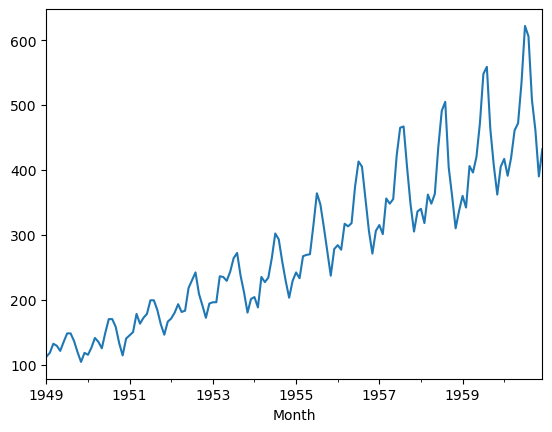

In [23]:
ts.plot()

### The plot shows that graph is upword . indicating that passengers are increasingly yearly
### indicates that data has trend ,seasonality and non stationary

In [27]:
import statsmodels.api as sm

### Decomposing the data

In [30]:
decomposition = sm.tsa.seasonal_decompose(ts)
decomposition

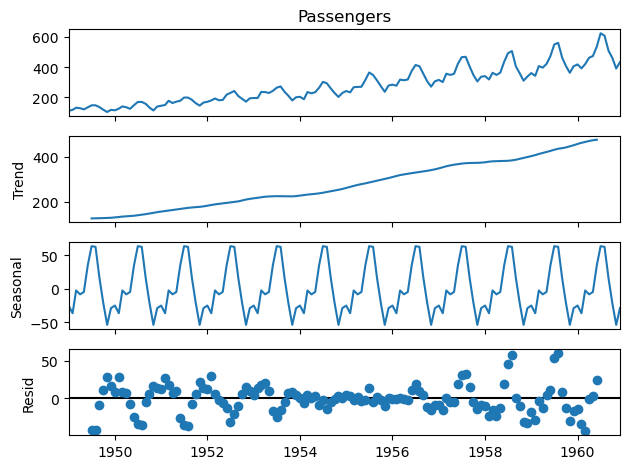

In [36]:
fig = decomposition.plot()
plt.show()

In [38]:
from statsmodels.tsa.stattools import adfuller

###  Making the data stationary. Bcz ARIMA works only on stationary data

In [42]:
adftest = adfuller(ts)
adftest

(0.8153688792060597,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [46]:
print("P value is :", adftest[1])

P value is : 0.9918802434376411


In [50]:
ts1 = data.Passengers.diff().dropna()
ts1

Month
1949-02-01     6.0
1949-03-01    14.0
1949-04-01    -3.0
1949-05-01    -8.0
1949-06-01    14.0
              ... 
1960-08-01   -16.0
1960-09-01   -98.0
1960-10-01   -47.0
1960-11-01   -71.0
1960-12-01    42.0
Name: Passengers, Length: 143, dtype: float64

In [52]:
adftest = adfuller(ts1)
adftest

(-2.829266824169992,
 0.0542132902838265,
 12,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 988.5069317854085)

In [54]:
print("P value is :", adftest[1])

P value is : 0.0542132902838265


In [60]:
ts2 = ts1.diff().dropna()
ts2

Month
1949-03-01      8.0
1949-04-01    -17.0
1949-05-01     -5.0
1949-06-01     22.0
1949-07-01     -1.0
              ...  
1960-08-01   -103.0
1960-09-01    -82.0
1960-10-01     51.0
1960-11-01    -24.0
1960-12-01    113.0
Name: Passengers, Length: 142, dtype: float64

In [64]:
adftest = adfuller(ts2)
adftest

(-16.384231542468527,
 2.732891850014085e-29,
 11,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 988.60204172756)

In [66]:
print("P value is :", adftest[1])

P value is : 2.732891850014085e-29


### Now Plotting and checking wether the data become stationary or not if not then we will continue the above process of Moving-Window until it becomes stationary .

<Axes: xlabel='Month'>

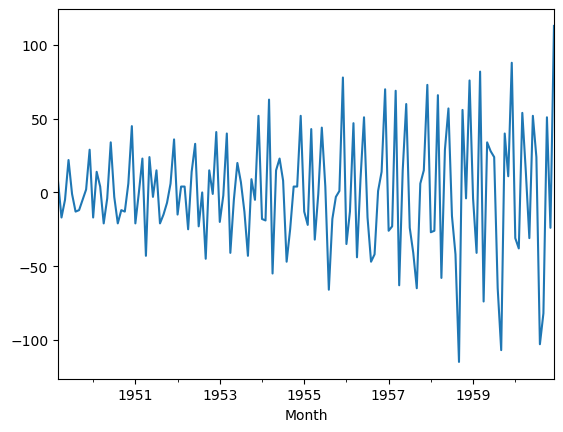

In [71]:
ts2.plot()

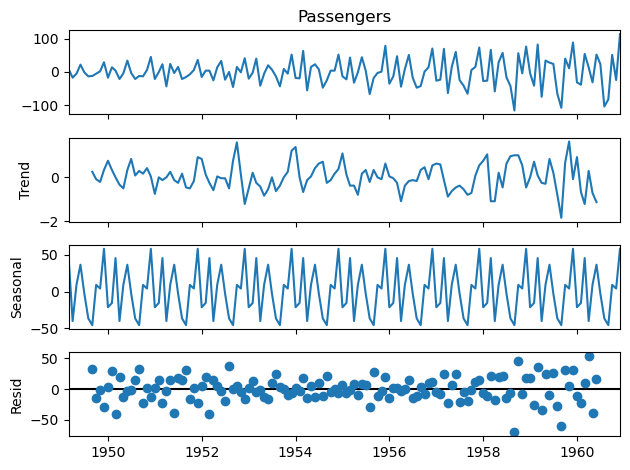

In [73]:
decomposition = sm.tsa.seasonal_decompose(ts2)
decomposition.plot()
plt.show()

### The graph has become more stationary than before

In [76]:
train = ts2[:120]
print("Traing data length is :", len(train))
test = ts2[120:]
print("Testing data length is :", len(test))

Traing data length is : 120
Testing data length is : 22


## ARIMA Model Building:
   - ARIMA model has three components/hyperparameters
        - AR  p
        - MA  q
        - Integrated order d

### Finding ARIMA Hyperparameters (p,q,d)

In [81]:
import itertools

In [83]:
p = range(0,8)
q = range(0,8)
d= range(0,2)

In [85]:
list(p) , list(q), list(d)

([0, 1, 2, 3, 4, 5, 6, 7], [0, 1, 2, 3, 4, 5, 6, 7], [0, 1])

### Making Combinations

In [99]:
pqd_combination= list(itertools.product(p,q,d))

In [101]:
pqd_combination

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (0, 2, 0),
 (0, 2, 1),
 (0, 3, 0),
 (0, 3, 1),
 (0, 4, 0),
 (0, 4, 1),
 (0, 5, 0),
 (0, 5, 1),
 (0, 6, 0),
 (0, 6, 1),
 (0, 7, 0),
 (0, 7, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1),
 (1, 2, 0),
 (1, 2, 1),
 (1, 3, 0),
 (1, 3, 1),
 (1, 4, 0),
 (1, 4, 1),
 (1, 5, 0),
 (1, 5, 1),
 (1, 6, 0),
 (1, 6, 1),
 (1, 7, 0),
 (1, 7, 1),
 (2, 0, 0),
 (2, 0, 1),
 (2, 1, 0),
 (2, 1, 1),
 (2, 2, 0),
 (2, 2, 1),
 (2, 3, 0),
 (2, 3, 1),
 (2, 4, 0),
 (2, 4, 1),
 (2, 5, 0),
 (2, 5, 1),
 (2, 6, 0),
 (2, 6, 1),
 (2, 7, 0),
 (2, 7, 1),
 (3, 0, 0),
 (3, 0, 1),
 (3, 1, 0),
 (3, 1, 1),
 (3, 2, 0),
 (3, 2, 1),
 (3, 3, 0),
 (3, 3, 1),
 (3, 4, 0),
 (3, 4, 1),
 (3, 5, 0),
 (3, 5, 1),
 (3, 6, 0),
 (3, 6, 1),
 (3, 7, 0),
 (3, 7, 1),
 (4, 0, 0),
 (4, 0, 1),
 (4, 1, 0),
 (4, 1, 1),
 (4, 2, 0),
 (4, 2, 1),
 (4, 3, 0),
 (4, 3, 1),
 (4, 4, 0),
 (4, 4, 1),
 (4, 5, 0),
 (4, 5, 1),
 (4, 6, 0),
 (4, 6, 1),
 (4, 7, 0),
 (4, 7, 1),
 (5, 0, 0),
 (5, 0, 1),
 (5, 1, 0),
 (5,

In [105]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [111]:
rmse=[]
order =[]
import warnings
warnings.filterwarnings('ignore')

In [113]:
for pqd in pqd_combination:
    model = ARIMA(train, order=pqd).fit()
    pred = model.predict(start =120, end = 141)
    error = np.sqrt(mean_squared_error(test,pred))
    print(error)
    order.append(pqd)
    rmse.append(error)

61.391767487721225
60.36022384673035
75.31569919647924
61.391806647020566
528.888500021073
78.26341418059422
4686.872416169855
541.9209611314727
175463.94619446824
4810.045797793532
2575442.932593418
183153.65867564097
29659320.196588453
2671273.4271604214
293515371.51669025
30612189.32065233
60.79406685531961
60.8264868717698
68.40646366216247
60.815298808472285
753.2235169031018
69.87211619623847
6004.654235922605
797.602770636186
19605.86966966781
6516.410124685568
121145.08456082133
19901.00956427929
1311234.3051944387
122110.435908798
277007.5895316502
1333068.957249093
61.26805180021934
61.67709212546585
60.44670433871869
61.27583244755173
383.6725843181297
60.51181111186144
2779.173248741946
415.7259961850192
24121.102933616563
2985.213394484612
444429.0872728116
26328.51000237854
2974854.4510944774
463452.2268558526
14745673.745317964
3075900.7790317526
62.21366727994337
61.39264545261761
60.793098895251624
62.161397867466434
334.9083620034793
60.786854512784046
4538.4856288066

In [117]:
result = pd.DataFrame(index=order, data = rmse, columns=['rmse'])

In [119]:
result.head()

,rmse
"(0, 0, 0)",61.391767
"(0, 0, 1)",60.360224
"(0, 1, 0)",75.315699
"(0, 1, 1)",61.391807
"(0, 2, 0)",528.888500


In [121]:
result.rmse.sort_values()

(7, 0, 1)    5.468151e+01
(7, 1, 0)    5.469396e+01
(7, 2, 1)    5.471259e+01
(6, 1, 0)    5.493354e+01
(6, 2, 1)    5.501808e+01
                 ...     
(2, 7, 0)    1.474567e+07
(0, 6, 0)    2.965932e+07
(0, 7, 1)    3.061219e+07
(7, 5, 1)    1.207911e+08
(0, 7, 0)    2.935154e+08
Name: rmse, Length: 128, dtype: float64

### After sorting rmse values we find the least squared error and its corresponding parameters

## Now Building ARIMA Model 

In [125]:
model = ARIMA(train, order=(7,0,1)).fit()

In [129]:
# Predicting on Test data 

pred = model.predict(start = 120, end= 141)
print(pred)

1959-03-01    -0.581914
1959-04-01   -41.680423
1959-05-01    47.060382
1959-06-01     0.810735
1959-07-01    15.476383
1959-08-01   -10.681914
1959-09-01   -23.484223
1959-10-01     8.875380
1959-11-01    -9.721907
1959-12-01    23.811686
1960-01-01    -4.830414
1960-02-01    -1.146389
1960-03-01    -4.974354
1960-04-01    -9.145223
1960-05-01     9.400226
1960-06-01    -2.826366
1960-07-01     8.250387
1960-08-01    -4.933535
1960-09-01    -2.624225
1960-10-01    -0.474030
1960-11-01    -2.709442
1960-12-01     5.632498
Freq: MS, Name: predicted_mean, dtype: float64


### Model Evaluation

In [132]:
np.sqrt(mean_squared_error(pred,test))

54.6815108331892

In [134]:
test.mean(), np.sqrt(test.var())

(2.727272727272727, 62.76500527719159)

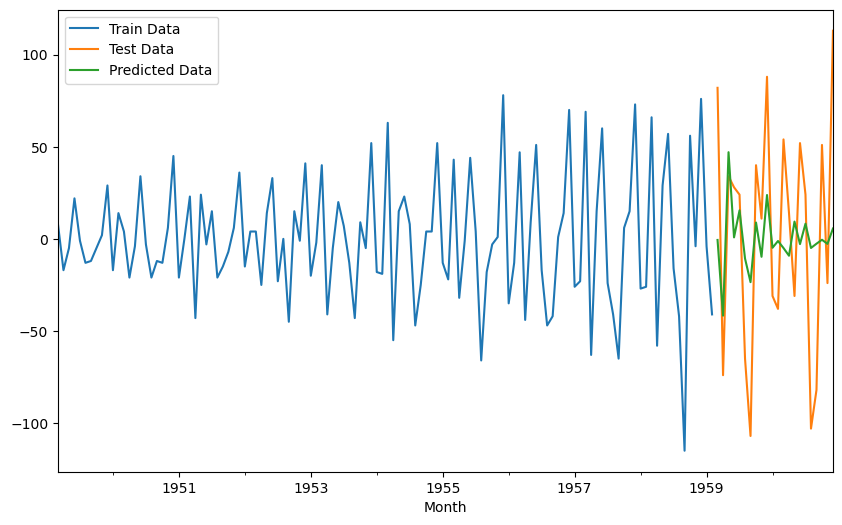

In [136]:
train.plot(legend= True, label = "Train Data", figsize = (10,6))
test.plot(legend = True , label ="Test Data")
pred.plot(legend=True, label="Predicted Data")
plt.show()

## Final Model:

<Axes: xlabel='Month'>

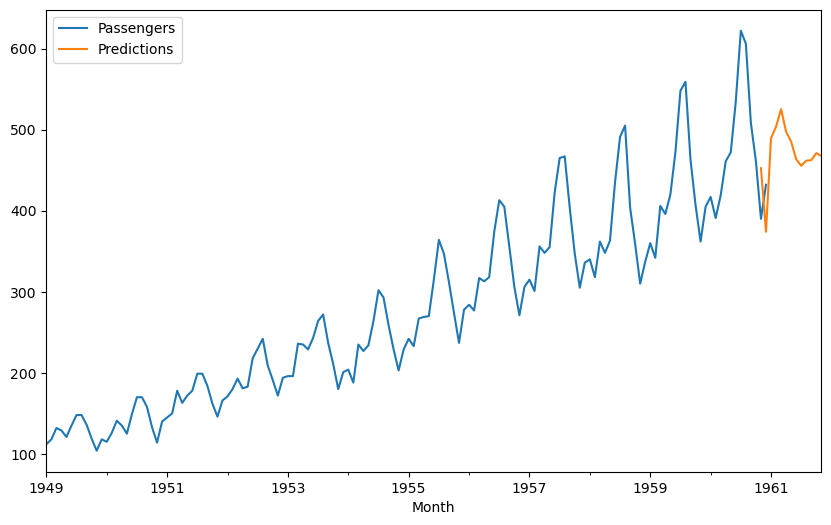

In [151]:
finalmodel = ARIMA(data,order= (7,0,1)).fit()
predictions = finalmodel.predict(142, len(data)+10)
data.plot(legend= True, label = "Train", figsize= (10,6))
predictions.plot(legend=True, label= 'Predictions')